<a href="https://colab.research.google.com/github/tiwariadarsh07/Machine-Learning-Projects/blob/main/Insurance%20Charge%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib as mpl

In [ ]:
!pip install pandas --quiet

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import  urlretrieve

In [ ]:
urlretrieve(medical_charges_url,"medical_charges.csv")

('medical_charges.csv', <http.client.HTTPMessage at 0x7fc144a539d0>)

In [ ]:
df = pd.read_csv("medical_charges.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.isnull().count == True

False

In [ ]:
sns.set_style("darkgrid")
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.histogram(
            df,
            x = 'age',
            marginal = 'box',
            nbins = 47,
            title = "Distribution of Age")
fig.update_layout(bargap = 0.2)
fig.show()

The normal Distribution(The age bar graph)
The guassion Distribution(The BMI Graph)

Question: What is Normal distribution vs Guassion Distibution.

In [ ]:
fig = px.histogram(df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence= ['red'],
                   title = 'Distribution of BMI (Body Mass Indes)')
fig.update_layout(bargap = 0.1 )
fig.show()

In [ ]:
fig = px.histogram(df,
                    x = 'charges',
                    marginal = "box",
                    color = 'smoker',
                    color_discrete_sequence = ['green', 'grey'],
                    title ='Annual Medical Charges')
 
fig.update_layout(bargap= 0.1)
fig.show()                   

**Smoker** 

Let's visualize the distribution of the "smoker" column(containing value "yes" and "no) using a histogram 

In [ ]:
# counts value of diffrent groups present within the column 
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(df, x='smoker', color ='sex', title= 'Smokers Male vs Female')

In [ ]:
fig = px.scatter(df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

BMI and Charges 

In [ ]:
fig  = px.scatter(df,
                  x = 'bmi',
                  y = 'charges',
                  color = 'smoker',
                  opacity = 0.8,
                  hover_data = ['sex'],
                  title = "BMI vs. Charges")
fig.update_traces(marker_size = 5)
fig.show()

Compare the following two graphs you will come to know the diffrence between Voilin and Scatter Graph 

In [ ]:
px.violin(df,
          x = 'children',
          y = "charges")


In [ ]:
px.scatter(df,
           x = 'children',
           y = 'charges')

Corrlelation Coefficient 

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
df.charges.corr(df.age)

0.2990081933306476

In [ ]:
df.charges.corr(df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [ ]:
smoker_values = {'no' : 0 ,'yes' : 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
smoker_numeric.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

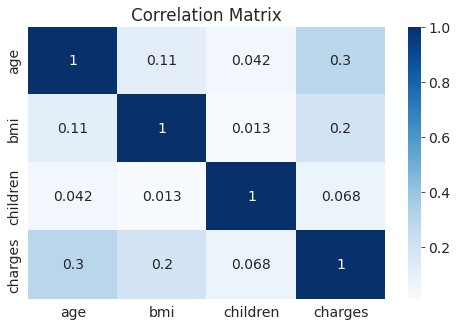

In [ ]:
sns.heatmap(df.corr(), cmap = "Blues", annot= True)
plt.title("Correlation Matrix")

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [ ]:
non_smoker_df = df[df.smoker =='no']

In [ ]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


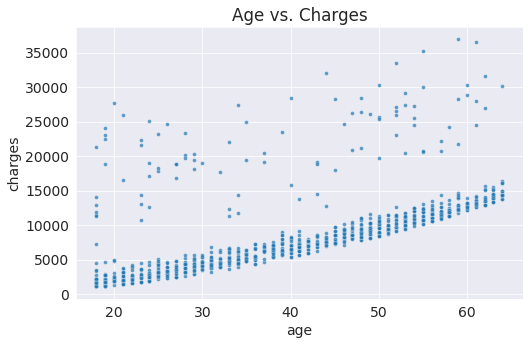

In [ ]:
plt.title("Age vs. Charges")
sns.scatterplot(
            data = non_smoker_df,
            x ="age",
            y ="charges",
            alpha = 0.7,
            s = 15
)

Assuming,

charges = w*age + b

where, w is weight and b is bias

In [ ]:
## This function will return the charges amount 
def estimate_charges(age,w,b):
  return w*age+b 

In [ ]:
w = 50
b = 100


In [ ]:
estimate_charges(30,w,b)

1600

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)

In [ ]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

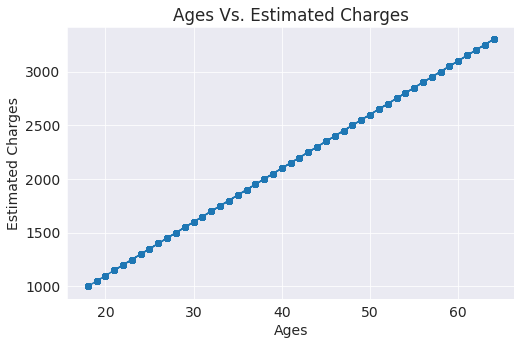

In [ ]:
plt.plot(ages,estimated_charges, "-o")
plt.xlabel('Ages')
plt.ylabel('Estimated Charges')
plt.title("Ages Vs. Estimated Charges")
plt.show()

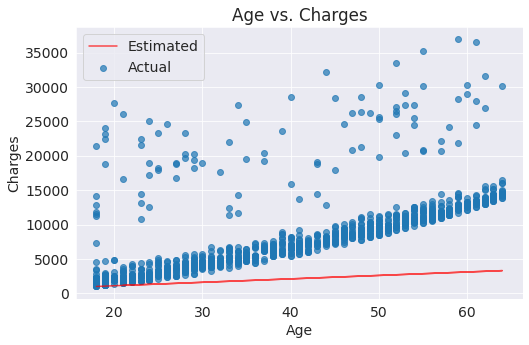

In [ ]:
plt.title("Age vs. Charges")
plt.scatter(non_smoker_df.age, non_smoker_df.charges, alpha=0.7)
plt.plot(ages,estimated_charges, color = 'red',alpha = 0.7)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimated","Actual"])

Now Creating New Function to chack different weight and bias 

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  price = ages*w+b

  plt.scatter(non_smoker_df.age, non_smoker_df.charges, alpha= 0.8)
  plt.plot(ages,price, alpha = 0.9,color ='red')
  plt.xlabel("Ages")
  plt.ylabel("Charges")
  plt.legend(['Estimated','Actual'])
  

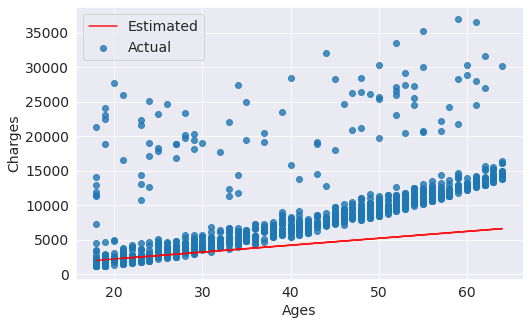

In [ ]:
try_parameters(100,200)

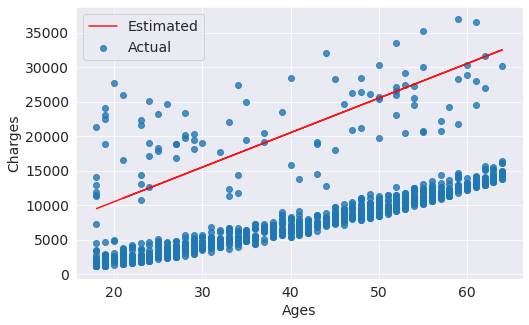

In [ ]:
try_parameters(500,500)

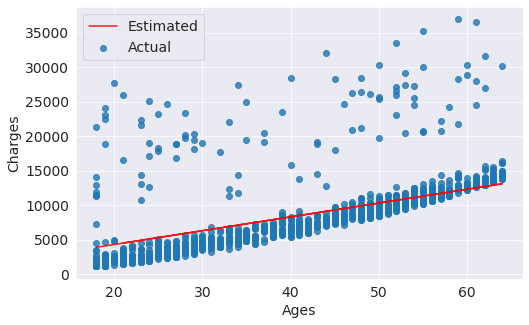

In [ ]:
try_parameters(200,300)

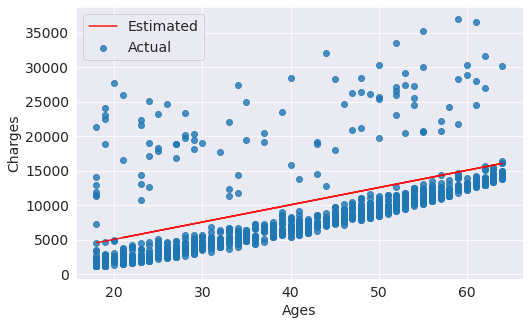

In [ ]:
try_parameters(250,50)

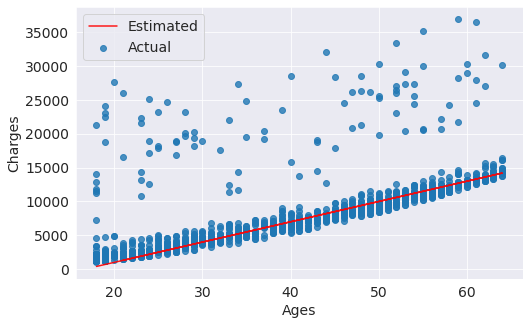

In [ ]:
try_parameters(300,-5000)

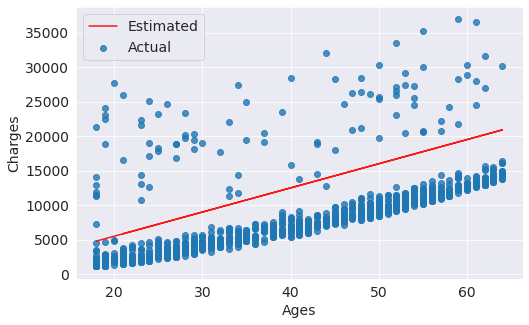

In [ ]:
try_parameters(350,-1500)

In [ ]:
# defining the rmse function in python
def rmse(target, predicted):
         return np.sqrt(np.mean(np.square(target-predicted)))

In [ ]:
target = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age,200,300)

In [ ]:
## Like this we can calculate the error manually
rmse(target,predicted)

4764.58353091187

##Optimiszer
Two methods are there 
Ordinary Least SquareGradient Descent 

## Using Ordinary Least Square Method

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
feature = non_smoker_df[['age']]
target = non_smoker_df.charges
print("Feature shape: ", feature.shape)
print("Target shape: ", target.shape)

Feature shape:  (1064, 1)
Target shape:  (1064,)


In [ ]:
model.fit(feature,target)

LinearRegression()

In [ ]:
model.predict([[23],[37],[61]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
prediction = model.predict(feature)

In [ ]:
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
np.array(target)

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [ ]:
mse = mean_squared_error(target,prediction)

In [ ]:
mse

21738960.023917634

In [ ]:
rmse = np.sqrt(mse)
rmse

4662.505766636395

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

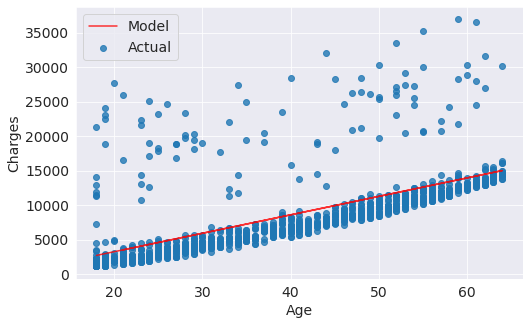

In [ ]:
plt.scatter(non_smoker_df.age, non_smoker_df.charges, alpha=0.8)
plt.plot(feature, prediction, color = 'red', alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(['Model','Actual'])

Generally, linear model uses ordinary least square method to find the best fit line. Now, try to use the SGDregressor fit the line.

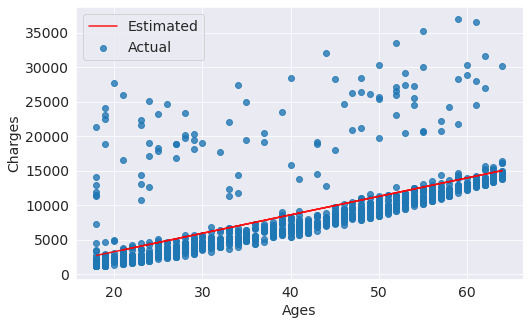

In [ ]:
# Plotting using self Defined function
try_parameters(model.coef_, model.intercept_)

## Now Using Stochastic Gradient Descent 

Now, Using SGD Regressor to train the model and find out prediction 

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_model = SGDRegressor()

In [ ]:
sgd_model.fit(feature,target)

SGDRegressor()

In [ ]:
#Prediction using SGD
sgd_predict = sgd_model.predict(feature)
sgd_predict

array([ 407.10004072, 3046.04985132, 4365.52475662, ...,  407.10004072,
        407.10004072, 1198.7849839 ])

In [ ]:
# Prediction using Ordinary Least Square method 
model.predict(feature)


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
# Original charges in the data set 
np.array(target)

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [ ]:
sgd_model.intercept_

array([-4343.00961837])

In [ ]:
sgd_model.coef_

array([263.89498106])

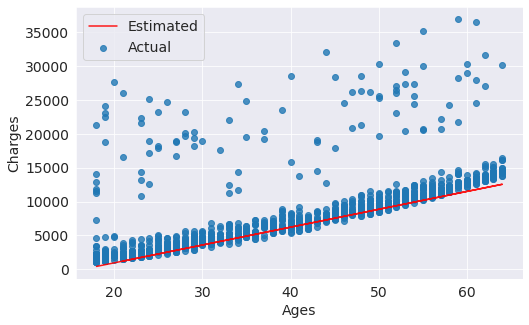

In [ ]:
# Best fit line by the SGD Model 
try_parameters(sgd_model.coef_, sgd_model.intercept_)

In [ ]:
sgd_mse = mean_squared_error(target, sgd_predict)
sgd_mse

27423142.275808502

In [ ]:
sgd_rmse= np.sqrt(sgd_mse)

## Linear Regression using multiple features



In [ ]:
features, target = non_smoker_df[["age",'bmi']],non_smoker_df.charges

In [ ]:
model.fit(features,target)

LinearRegression()

In [ ]:
prediction = model.predict(features)

In [ ]:
np.array(target)

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [ ]:
print(f"Weight: {model.coef_}\n Bias: {model.intercept_}")

Weight: [266.87657817   7.07547666]
 Bias: -2293.6320906488727


In [ ]:
mse = mean_squared_error(target, predicted)

In [ ]:
rmse = np.sqrt(mse)
rmse

4764.583530911869

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




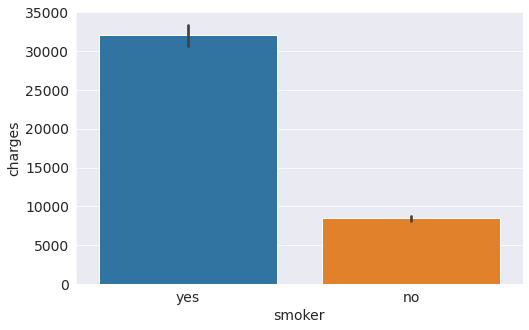

In [ ]:
sns.barplot(data = df, x= 'smoker', y = 'charges')

In [ ]:
smoke_encoder = {"yes": 1,"no": 0}
df.smoker= df.smoker.map(smoke_encoder)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
# Now, Data type of smoker is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
df.charges.corr(df.smoker)

0.787251430498478

##One-Hot Encoding 

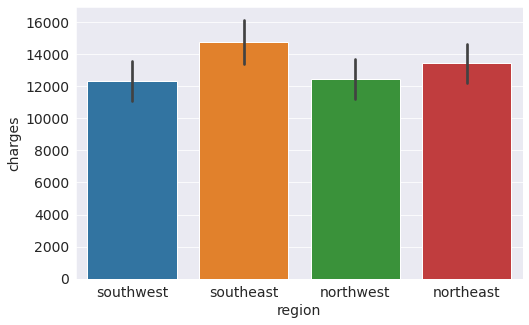

In [ ]:
sns.barplot(data= df, x ='region', y = 'charges')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
## Encodr takes 2D-array
encoder.fit(df[['region']])

OneHotEncoder()

In [ ]:
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = encoder.transform(df[['region']]).toarray()

In [ ]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northest','northwest','southeast','southwest']] = one_hot

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northest,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
code = {'male': 1, 'female': 0}
df.sex = df.sex.map(code)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northest,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
features = df[['age','sex','bmi','smoker','northest','northwest','southeast','southwest']]
features.head()

,age,sex,bmi,smoker,northest,northwest,southeast,southwest
0,19,0,27.900,1,0.0,0.0,0.0,1.0
1,18,1,33.770,0,0.0,0.0,1.0,0.0
2,28,1,33.000,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0.0,1.0,0.0,0.0


In [ ]:
target = df['charges']
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
model.fit(features,target)

LinearRegression()

In [ ]:
prediction= model.predict(features)
prediction

array([25800.5729778 ,  3443.29164365,  5766.53504894, ...,
        4603.475935  ,  1739.78175068, 37669.91535375])

In [ ]:
mse = mean_squared_error(target,prediction)

In [ ]:
np.sqrt(mse)

6068.68259297263

Now, Creating two diffrent Model


1.   For smoker 
2.   For Non smoker
Will divide the data set into smoker and non smoker

This is to see whether we can create a better model with low RMSE if we divide the data b/w smoker and non-smokers



In [ ]:
smoker_df = df[df['smoker']==1]
non_smoker_df = df[df['smoker']==0]

##NON-Smokers

In [ ]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,northest,northwest,southeast,southwest
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
5,31,0,25.740,0,0,southeast,3756.62160,0.0,0.0,1.0,0.0


In [ ]:
non_smoker_feature = non_smoker_df[['age','sex','bmi','smoker','northest','northwest','southeast','southwest']]
non_smoker_target = non_smoker_df['charges']

In [ ]:
non_smoker_model = LinearRegression()
non_smoker_model.fit(non_smoker_feature,non_smoker_target)


LinearRegression()

In [ ]:
prediction = non_smoker_model.predict(non_smoker_feature)

In [ ]:
non_smoker_rmse = np.sqrt(mean_squared_error(non_smoker_target,prediction))
non_smoker_rmse

4628.55205514587

Smoker 

In [ ]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,northest,northwest,southeast,southwest
0,19,0,27.90,0,1,southwest,16884.9240,0.0,0.0,0.0,1.0
11,62,0,26.29,0,1,southeast,27808.7251,0.0,0.0,1.0,0.0
14,27,1,42.13,0,1,southeast,39611.7577,0.0,0.0,1.0,0.0
19,30,1,35.30,0,1,southwest,36837.4670,0.0,0.0,0.0,1.0
23,34,0,31.92,1,1,northeast,37701.8768,1.0,0.0,0.0,0.0


In [ ]:
smoker_feature = smoker_df[['age','sex','bmi','smoker','northest','northwest','southeast','southwest']]
smoker_target = smoker_df['charges']

In [ ]:
smoker_model = LinearRegression()
smoker_model.fit(smoker_feature,smoker_target)

LinearRegression()

In [ ]:
smoker_prediction = non_smoker_model.predict(smoker_feature)

In [ ]:
smoker_rmse = np.sqrt(mean_squared_error(smoker_target,smoker_prediction))
smoker_rmse

26196.884426118984

Final Conclusion:
* RMSE on Total Data: 6068.68259297263
* RMSE For Non-Smoker: 4628.55205514587
* RMSE For Smoker: 26196.884426118984

*   We have mininised the error after dividing the dataset b/w smokers and non-smokers for Non-Smoker Category


## Model Improvement

While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
df[numeric_cols] = scaler.transform(df[numeric_cols])
df[numeric_cols]

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northest,northwest,southeast,southwest
0,-1.438764,0,-0.453320,-0.908614,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,-0.078767,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,1.580926,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,-0.908614,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,-0.908614,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
df.drop('region', axis = 1, inplace = True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,northest,northwest,southeast,southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
new_feature = df[['age','sex','bmi','children','smoker','northest','northwest','southeast','southwest']]
label = df['charges']

In [ ]:
new_model = LinearRegression()

In [ ]:
new_model.fit(new_feature,label)

LinearRegression()

In [ ]:
new_feature.head()

,age,sex,bmi,children,smoker,northest,northwest,southeast,southwest
0,-1.438764,0,-0.453320,-0.908614,1,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,-0.078767,0,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,1.580926,0,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,-0.908614,0,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,-0.908614,0,0.0,1.0,0.0,0.0


In [ ]:
new_predict = new_model.predict(new_feature)

In [ ]:
new_model.intercept_

8466.483215411834

In [ ]:
new_model.coef_

array([ 3607.47273619,  -131.3143594 ,  2067.69196584,   572.99820995,
       23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
rmse = np.sqrt(mean_squared_error(label,new_predict))
rmse

6041.6796511744515

In [ ]:
df.head(0)

,age,sex,bmi,children,smoker,charges,northest,northwest,southeast,southwest


In [ ]:
df_weight = pd.DataFrame({
    'feature': ['age','sex','bmi','children','smoker','northest','northwest','southeast','southwest'],
     'weights': new_model.coef_
})
df_weight.sort_values('weights', ascending = True)

,feature,weights
7,southeast,-448.012814
8,southwest,-373.041756
1,sex,-131.314359
6,northwest,234.045336
3,children,572.998210
5,northest,587.009235
2,bmi,2067.691966
0,age,3607.472736
4,smoker,23848.534542
